# Let's try text analysis!

There are so many things you can do with text analysis! Create visualizations, convert text to tables, or compare texts. In this notebook we are going to do all three.

## 1. We need to pick a dataset

How about music lyrics? There is an API called MusiXmatch that allows for non-commerical use of their API, which includes lyrics. This only allows for 30% of the lyrics, but we will use it anyway for practice. I was able to get access to this API with my .edu email address. There are a lot of APIs that will allow for education access.

First we need to get the lyrics. I did this making an API call to MusiXmatch. Let's pick a band or musician and a song. Any suggestions?

In [33]:
import Constants
import json
import re

In [34]:
from musixmatch import Musixmatch

music_key=Constants.MUSIXMATCH_KEY

musixmatch = Musixmatch(music_key)

lyrics = musixmatch.matcher_lyrics_get('[SONG]', '[ARTIST]')
lyrics = re.sub(r"\\n", " ", json.dumps(lyrics["message"]["body"]["lyrics"]["lyrics_body"]))
lyrics = re.sub(r"(.+)(\.\.\..+)", r"\1", lyrics)

print (lyrics)


"I walked through the door with you, the air was cold But somethin' 'bout it felt like home somehow And I left my scarf there at your sister's house And you've still got it in your drawer, even now  Oh, your sweet disposition and my wide-eyed gaze We're singin' in the car, getting lost upstate Autumn leaves fallin' down like pieces into place And I can picture it after all these days  And I know it's long gone and That magic's not here no more And I might be okay, but I'm not fine at all Oh, oh, oh  'Caus\u0435 there we ar\u0435 again on that little town street You almost ran the red 'cause you were lookin' over at me Wind in my hair, I was there I remember it all too well  Photo album on the counter Your cheeks were turnin' red You used to be a little kid with glasses in a twin-sized bed And your mother's tellin' stories 'bout you on the tee-ball team You taught me 'bout your past thinkin' your future was me  And you were tossing me the car keys \"Fuck the Patriarchy\" keychain on the

## 2. Convert the text to tokens

Great! Now we have the song lyrics as text named `lyrics`. What can we do with it now? Let's start by turning the lyrics into tokens using spaCy.

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(lyrics)
print(doc)
print (len(lyrics))
print (len(doc))

"I walked through the door with you, the air was cold But somethin' 'bout it felt like home somehow And I left my scarf there at your sister's house And you've still got it in your drawer, even now  Oh, your sweet disposition and my wide-eyed gaze We're singin' in the car, getting lost upstate Autumn leaves fallin' down like pieces into place And I can picture it after all these days  And I know it's long gone and That magic's not here no more And I might be okay, but I'm not fine at all Oh, oh, oh  'Caus\u0435 there we ar\u0435 again on that little town street You almost ran the red 'cause you were lookin' over at me Wind in my hair, I was there I remember it all too well  Photo album on the counter Your cheeks were turnin' red You used to be a little kid with glasses in a twin-sized bed And your mother's tellin' stories 'bout you on the tee-ball team You taught me 'bout your past thinkin' your future was me  And you were tossing me the car keys \"Fuck the Patriarchy\" keychain on the

The lyrics look the same, but we can see from the length difference between `lyrics` and `doc`, `doc` contains tokens. 

## 3. Create visualizations

One way to do text analysis is doing visualization of the parts of speech. SpaCy has a built in dependency visualizer:

In [37]:
from spacy import displacy

In [38]:
displacy.render(doc, style="dep", jupyter = True, options={'distance':140})

## 4. Convert entity tagging to tables

Creating a table out of the parts of speech will make it even easier to do data analysis. We could even compare to other songs! So let's start with using Pandas to convert our parts of speech analysis to a table with the counts of each parts of speech.

In [39]:
#!pip install pandas

In [40]:
import pandas as pd

In [41]:
list_of_strings  = [i.text for i in doc]
list_of_tokens = [j.pos_ for j in doc]

In [42]:
df = pd.DataFrame({'token': list_of_strings, 'POS': list_of_tokens })
#pd.DataFrame({'a':[1,2], 'b':[3,4]})

In [43]:
df['POS'].value_counts()

PRON     62
NOUN     54
VERB     33
ADV      28
ADP      27
AUX      26
PUNCT    24
CCONJ    21
DET      20
ADJ      16
PART      9
SPACE     7
PROPN     5
INTJ      4
SCONJ     3
NUM       1
Name: POS, dtype: int64

I want to see how this song compares to another. First, we need to bring in another song.

In [44]:
from musixmatch import Musixmatch

music_key=Constants.MUSIXMATCH_KEY

musixmatch = Musixmatch(music_key)

lyrics2 = musixmatch.matcher_lyrics_get('[SONG]', '[ARTIST]')
lyrics2 = re.sub(r"\\n", " ", json.dumps(lyrics2["message"]["body"]["lyrics"]["lyrics_body"]))
lyrics2 = re.sub(r"(.+)(\.\.\..+)", r"\1", lyrics2)

print (lyrics2)

"Long long time ago, I can still remember How that music used to make me smile And I knew if I had my chance That I could make those people dance And maybe they'd be happy for a while  But February made me shiver With every paper I'd deliver Bad news on the doorstep I couldn't take one more step  I can't remember if I cried When I read about his widowed bride But something touched me deep inside The day the music died  So bye-bye, Miss American Pie Drove my Chevy to the levee But the levee was dry Them good old boys were drinking whiskey and rye Singing, \"This'll be the day that I die\" This will be the day that I die  Did you write the Book of Love? And do you have faith in God above? If the Bible tells you so Do you believe in rock 'n' roll? Can music save your mortal soul? And can you teach me how to dance real slow?  Well I know that you're in love with him 'Cause I saw you dancing in the gym You both kicked off your shoes Then I dig those rhythm and blues  I was a lonely teenage 

In [45]:
doc2 = nlp(lyrics2)
print(doc2)
print (len(lyrics2))
print (len(doc2))

"Long long time ago, I can still remember How that music used to make me smile And I knew if I had my chance That I could make those people dance And maybe they'd be happy for a while  But February made me shiver With every paper I'd deliver Bad news on the doorstep I couldn't take one more step  I can't remember if I cried When I read about his widowed bride But something touched me deep inside The day the music died  So bye-bye, Miss American Pie Drove my Chevy to the levee But the levee was dry Them good old boys were drinking whiskey and rye Singing, \"This'll be the day that I die\" This will be the day that I die  Did you write the Book of Love? And do you have faith in God above? If the Bible tells you so Do you believe in rock 'n' roll? Can music save your mortal soul? And can you teach me how to dance real slow?  Well I know that you're in love with him 'Cause I saw you dancing in the gym You both kicked off your shoes Then I dig those rhythm and blues  I was a lonely teenage 

In [46]:
list_of_strings2  = [k.text for k in doc2]
list_of_tokens2 = [l.pos_ for l in doc2]

In [48]:
df2 = pd.DataFrame({'token': list_of_strings2, 'POS': list_of_tokens2 })
#pd.DataFrame({'a':[1,2], 'b':[3,4]})

In [49]:
df2['POS'].value_counts()

PRON     52
NOUN     46
VERB     44
AUX      29
DET      24
ADP      19
PUNCT    15
ADJ      15
CCONJ    15
PROPN    15
ADV      11
SCONJ     9
SPACE     8
PART      5
INTJ      4
NUM       2
Name: POS, dtype: int64

This information is more accurate for comparison if we look at the percentages rather than the counts, so let's convert count to percent:

In [50]:
table2= df2['POS'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='Song 2')
table2['Song 2'] = table2['Song 2'] * 100
print(table2)

   unique_values     Song 2
0           PRON  16.613419
1           NOUN  14.696486
2           VERB  14.057508
3            AUX   9.265176
4            DET   7.667732
5            ADP   6.070288
6          PUNCT   4.792332
7            ADJ   4.792332
8          CCONJ   4.792332
9          PROPN   4.792332
10           ADV   3.514377
11         SCONJ   2.875399
12         SPACE   2.555911
13          PART   1.597444
14          INTJ   1.277955
15           NUM   0.638978


In [51]:
table= df['POS'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='Song 1')
table['Song 1'] = table['Song 1'] * 100

print(table)

   unique_values     Song 1
0           PRON  18.235294
1           NOUN  15.882353
2           VERB   9.705882
3            ADV   8.235294
4            ADP   7.941176
5            AUX   7.647059
6          PUNCT   7.058824
7          CCONJ   6.176471
8            DET   5.882353
9            ADJ   4.705882
10          PART   2.647059
11         SPACE   2.058824
12         PROPN   1.470588
13          INTJ   1.176471
14         SCONJ   0.882353
15           NUM   0.294118


Time to put our two tables together so the songs can be compared:

## Compare songs!

Now that the parts of speech are converted to tables, we can compare songs!

In [53]:
right = table
left = table2
result = pd.merge(left, right, on=['unique_values'])
print(result)

   unique_values     Song 2     Song 1
0           PRON  16.613419  18.235294
1           NOUN  14.696486  15.882353
2           VERB  14.057508   9.705882
3            AUX   9.265176   7.647059
4            DET   7.667732   5.882353
5            ADP   6.070288   7.941176
6          PUNCT   4.792332   7.058824
7            ADJ   4.792332   4.705882
8          CCONJ   4.792332   6.176471
9          PROPN   4.792332   1.470588
10           ADV   3.514377   8.235294
11         SCONJ   2.875399   0.882353
12         SPACE   2.555911   2.058824
13          PART   1.597444   2.647059
14          INTJ   1.277955   1.176471
15           NUM   0.638978   0.294118


This kind of comparison would be interesting as a bar chart. This makes it easier to visualize the differences. There is another tool, `matplotlib`, we can import which will make the table above into a graph so the song comparison can be visualized. 

In [54]:
#! pip install matplotlib

In [55]:
from matplotlib import pyplot as plt

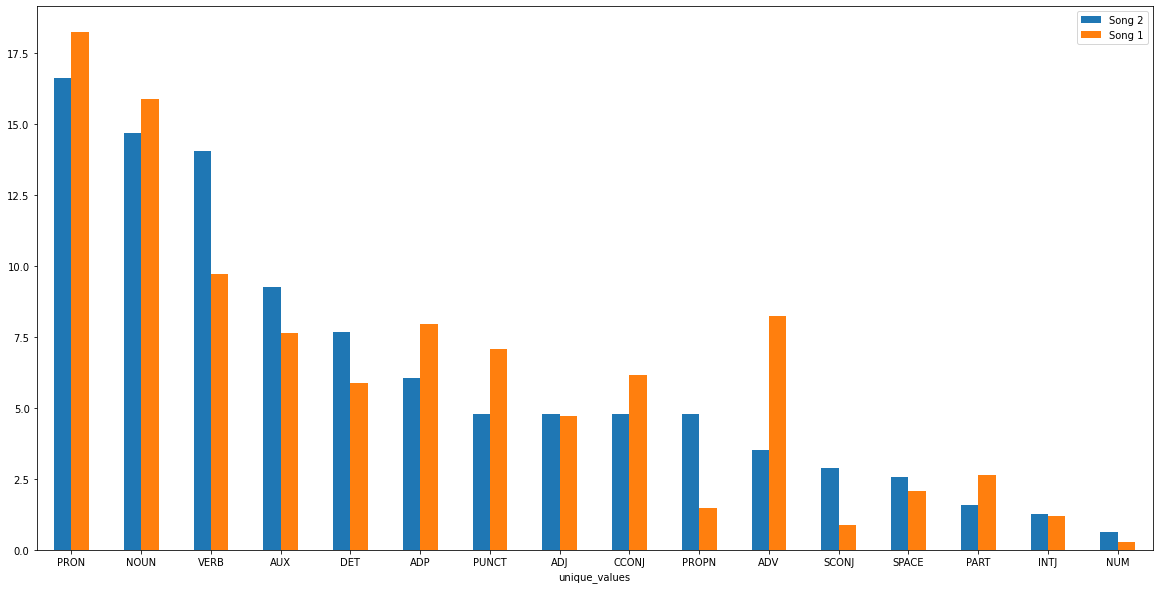

In [56]:
result['unique_values'] *100
result.plot.bar(x='unique_values', rot=0, figsize=(20, 10));

The nice part of Jupyter notebooks is that you can run through an entire text analysis, change your mind, and run things again differently. We might want to try removing spaces or punctuation from this comparision, for example. 